In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


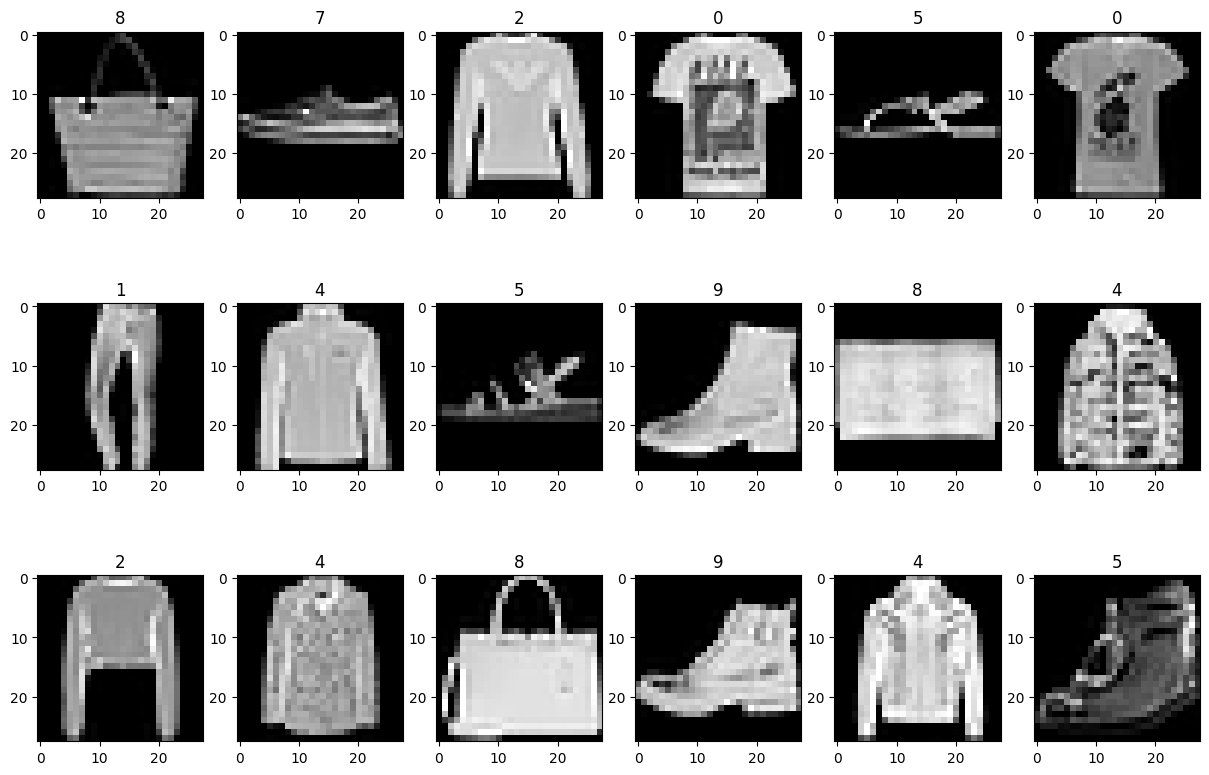

In [7]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

In [8]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [9]:
from tensorflow.keras.layers import Input, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

# Define the model
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
net = Flatten()(net)
net = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01))(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0   

In [13]:
epochs = 50
batch_size = 64

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 56s 59ms/step - loss: 1.1320 - accuracy: 0.8068 - val_loss: 0.7061 - val_accuracy: 0.8678
Epoch 2/50
938/938 [==============================] - 53s 57ms/step - loss: 0.7800 - accuracy: 0.8438 - val_loss: 0.7167 - val_accuracy: 0.8667
Epoch 3/50
938/938 [==============================] - 49s 53ms/step - loss: 0.7621 - accuracy: 0.8489 - val_loss: 0.6927 - val_accuracy: 0.8749
Epoch 4/50
938/938 [==============================] - 50s 54ms/step - loss: 0.7601 - accuracy: 0.8511 - val_loss: 0.6670 - val_accuracy: 0.8664
Epoch 5/50
938/938 [==============================] - 51s 54ms/step - loss: 0.7361 - accuracy: 0.8536 - val_loss: 0.7125 - val_accuracy: 0.8647
Epoch 6/50
938/938 [==============================] - 50s 54ms/step - loss: 0.7281 - accuracy: 0.8569 - val_loss: 0.7201 - val_accuracy: 0.8751
Epoch 7/50
938/938 [==============================] - 49s 53ms/step - loss: 0.7273 - accuracy: 0.8555 - val_loss: 0.6446 - val_accuracy:

Train Acc      0.862933337688446
Validation Acc 0.8815000057220459


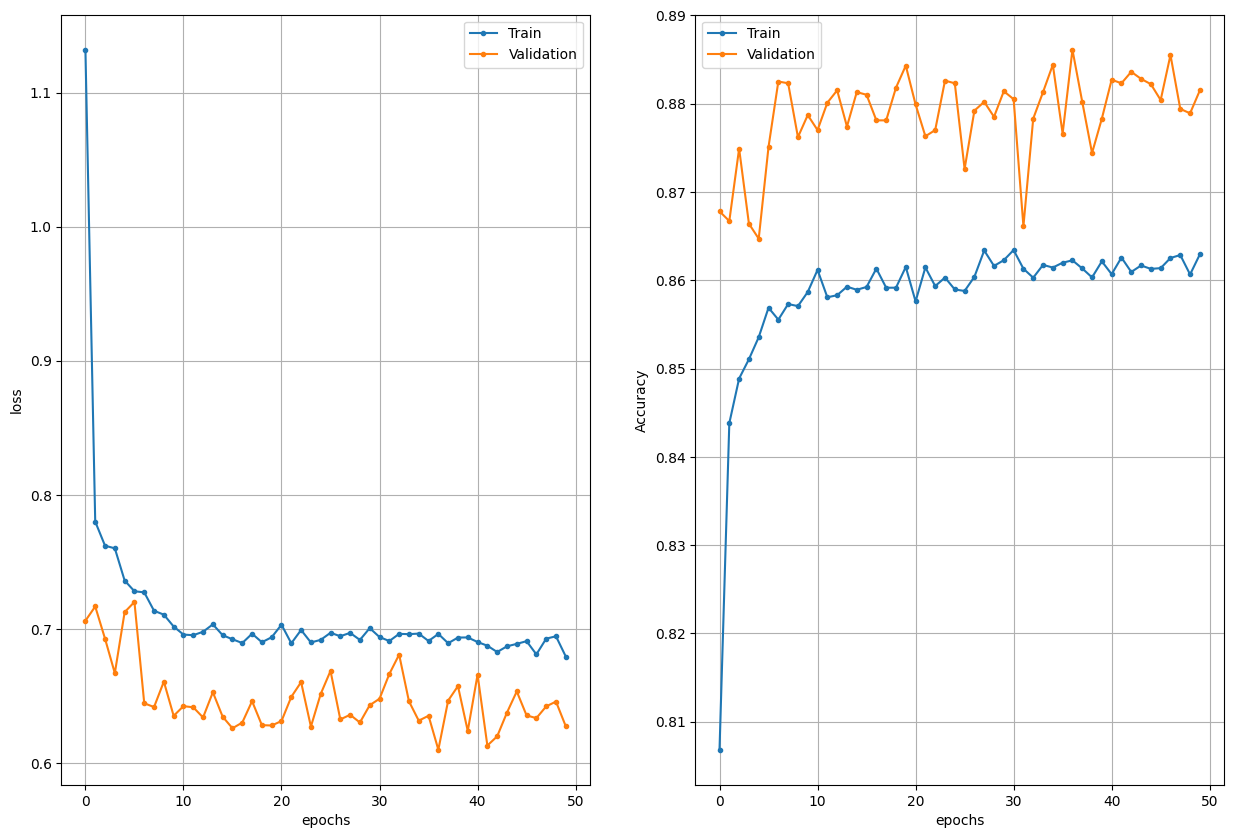

In [14]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)